 과제 : 데이콘의 '와인 품질 분류 예측 경진대회' 데이터셋을 전처리 및 시각화하고, 분류 알고리즘을 적용한다.

- 조건 : 분류 모델 3가지 이상 적용

* 분석 파일을 1) 제출 후 리더보드에서 점수 확인 2) github에 업로드하여 점수와 깃허브 링크를 과제함에 댓글로 달아주시면 됩니다. 점수 고득점팀 1위 조원분들께는 우수학회원 점수 가산이 있을 예정입니다.

5/1~5/22까지 매주 월요일 발표 이후 조별로 모여 프로젝트를 진행합니다. 회의 이후에는 아래 일정에 따라 카페에 계획서, 보고서, 제출물을 올려주시기 바랍니다. 

📍 1주차 (5/1~5/9 화) : 5/9 (화)까지 프로젝트 회의 보고서 제출
📍 2주차 (5/15 월) : 5/15 (월)까지 프로젝트 회의 보고서 제출 
📍 3주차 (5/22 월) : 5/22 (월)까지 프로젝트 회의 보고서 제출
-> 5/22(월)까지 최종 결과물(깃허브링크) 제출

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [28]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type_red              5497 non-null   uint8  
 14  type_white            5497 non-null   uint8  
dtypes: float64(11), int64

In [29]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [30]:
# one-hot encoding for X
train=pd.get_dummies(data=train, columns=['type'], prefix=['type'])
test=pd.get_dummies(data=test, columns=['type'], prefix=['type'])
# label encoding for y
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train['quality']=encoder.fit_transform(train['quality'])

In [31]:
X=train.iloc[:,2:]
y=train['quality']

In [32]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,0,2,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0,1
1,1,2,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1,0
2,2,2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0,1
3,3,3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0,1
4,4,3,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0,1


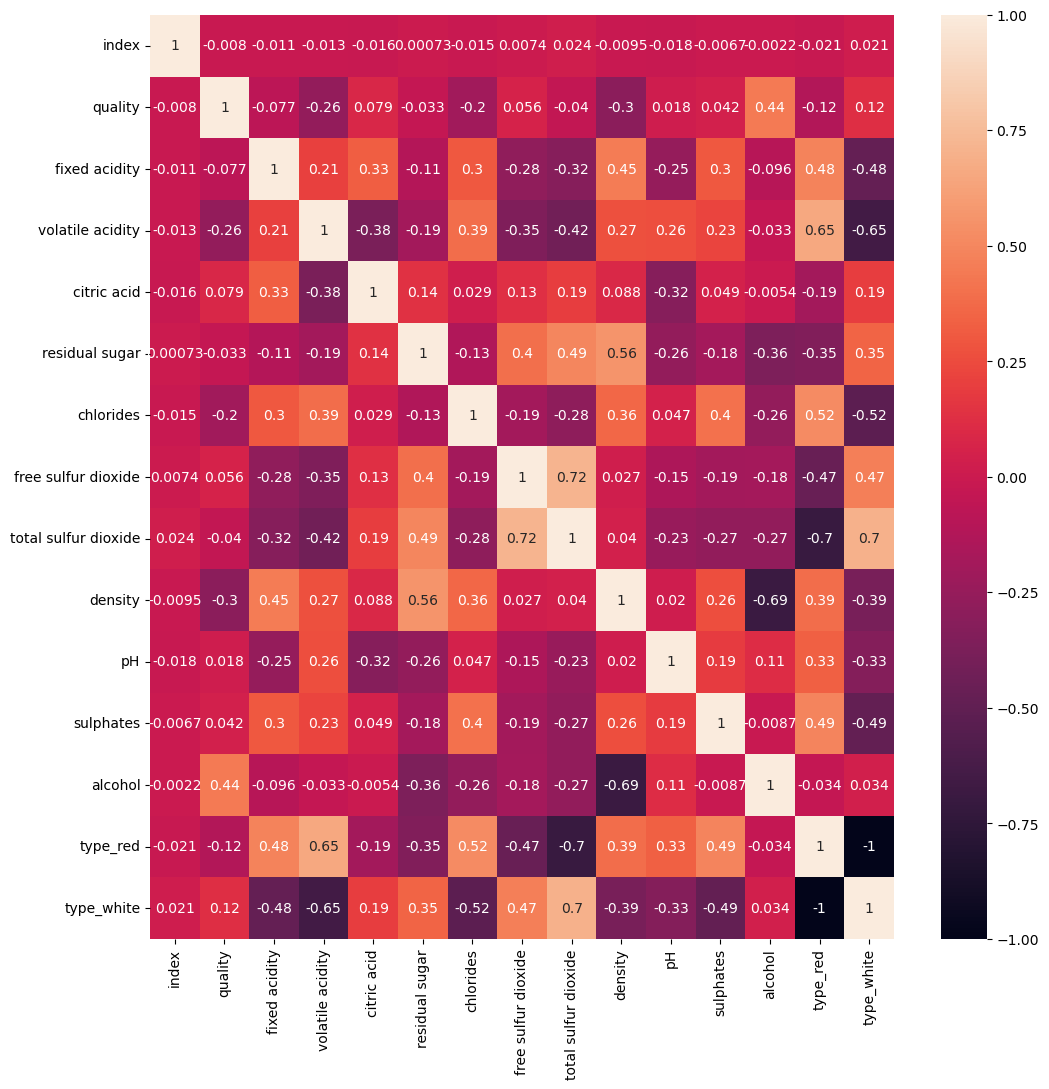

In [60]:
# train의 변수 간 상관관계
plt.figure(figsize=(12,12))
sns.heatmap(data = train.corr(), annot=True)
plt.show()

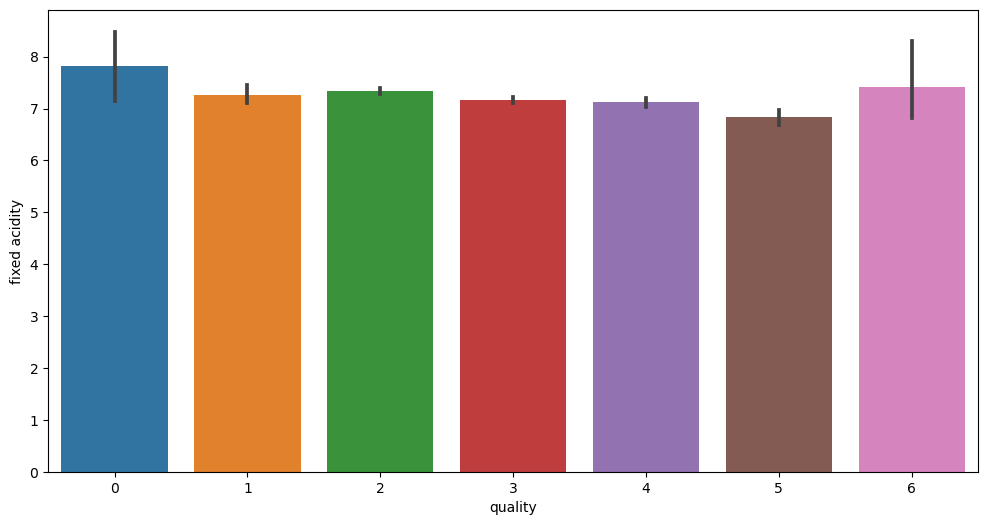

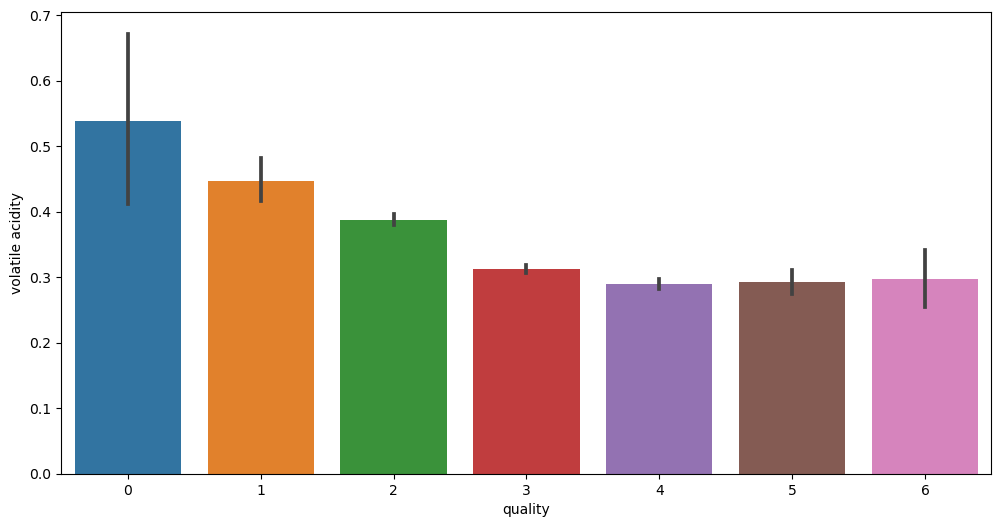

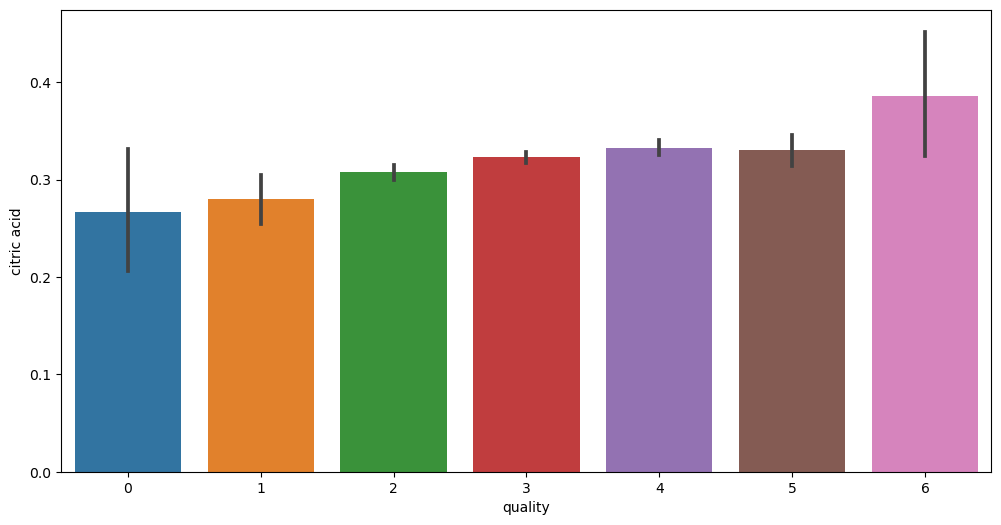

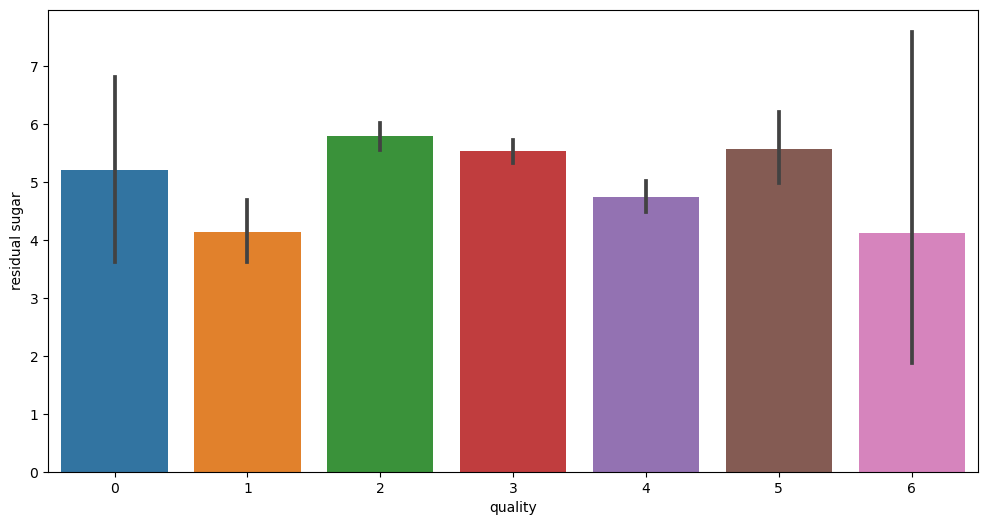

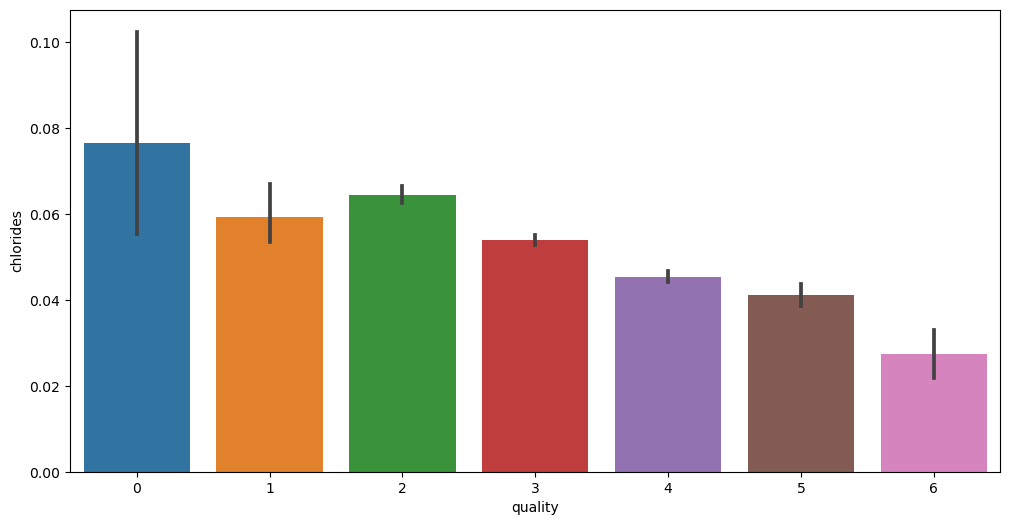

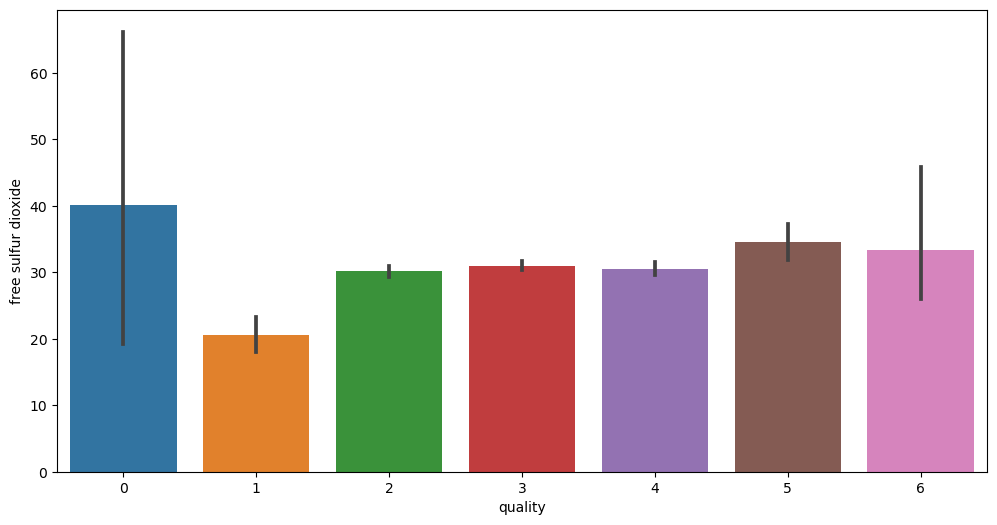

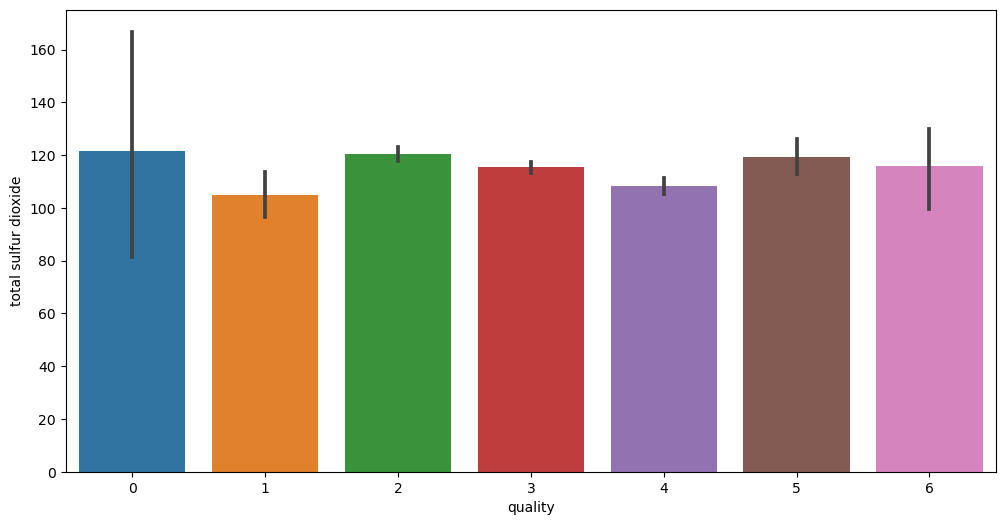

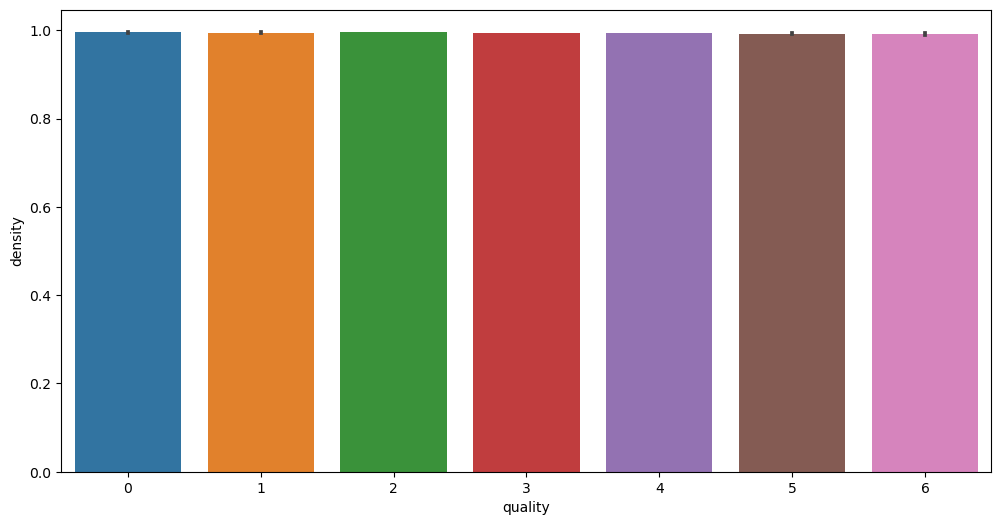

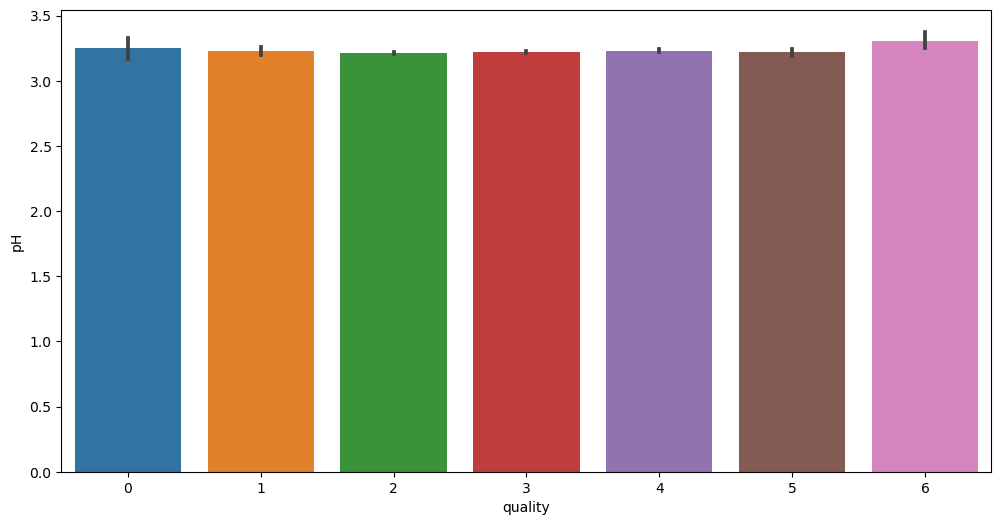

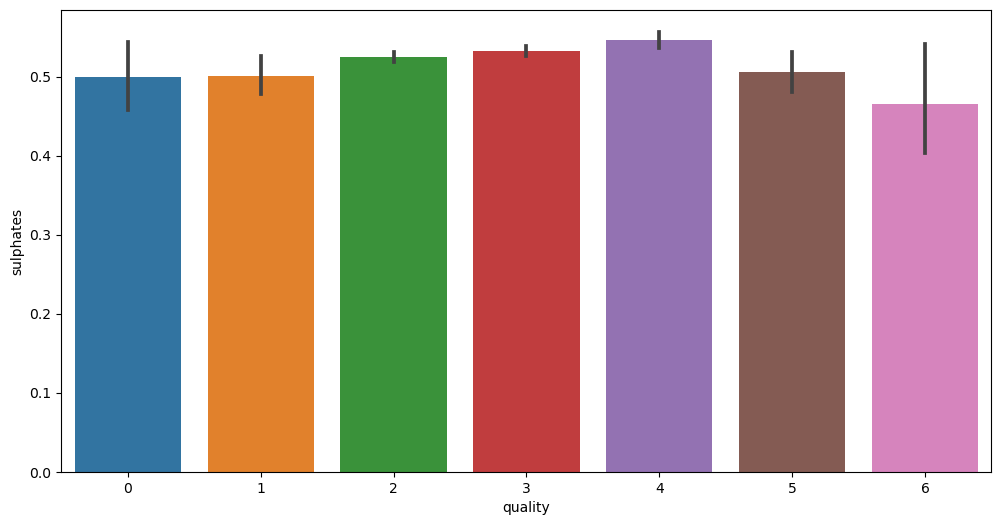

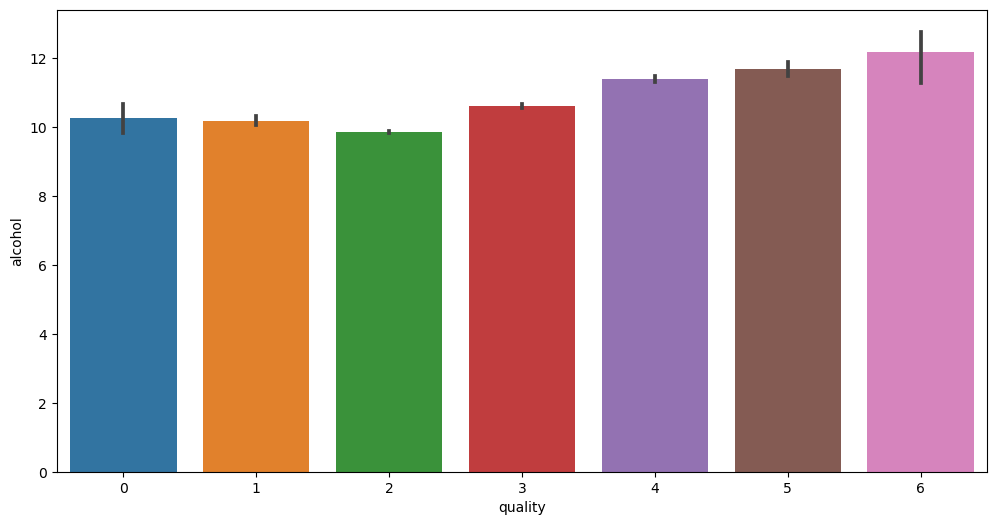

In [59]:
# train에서 각 변수와 quality 변수 사이 분포를 확인
for i in range(11):
    fig = plt.figure(figsize = (12,6))
    sns.barplot(x = 'quality', y = train.columns[i+2], data = train)

C:\Users\Kim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

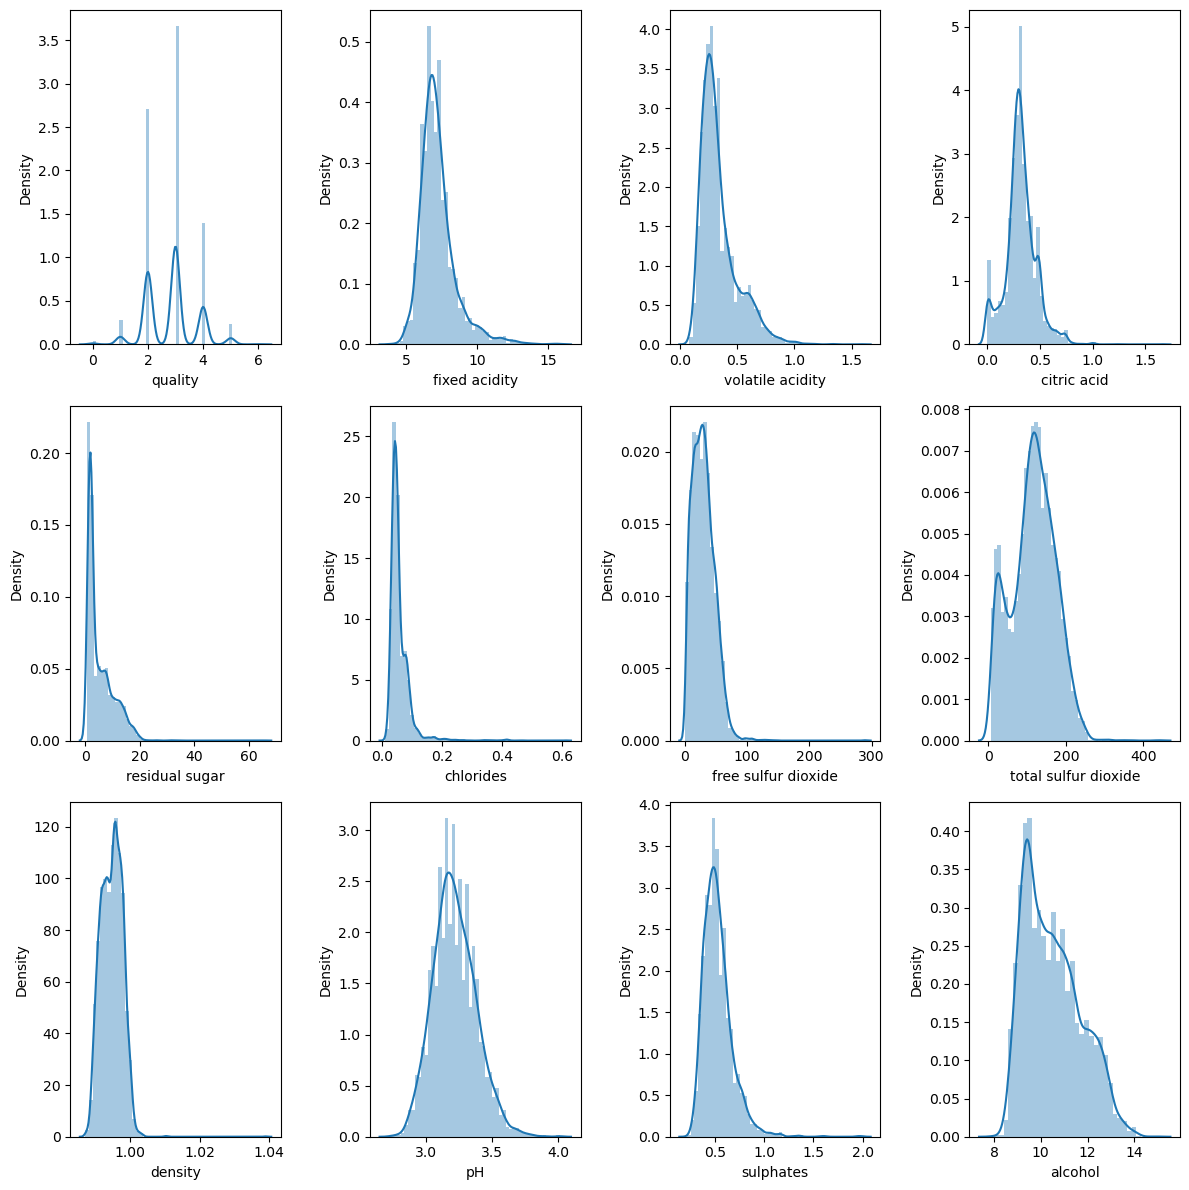

In [58]:
# train의 각 변수별 분포
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

In [33]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,0,1
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,1,0
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0,1
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,0,1
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,0,1


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=random_state)

In [35]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
5273,6.6,0.240,0.28,6.7,0.032,26.0,91.0,0.99172,3.13,0.32,12.3,0,1
4671,6.5,0.230,0.39,1.9,0.036,41.0,98.0,0.99000,3.19,0.43,11.9,0,1
4116,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.5,1,0
1651,6.1,0.380,0.14,3.9,0.060,27.0,113.0,0.99344,3.07,0.34,9.2,0,1
1299,7.5,1.115,0.10,3.1,0.086,5.0,12.0,0.99580,3.54,0.60,11.2,1,0


In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred1 = model.predict(X_valid)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print(round(accuracy_score(y_valid, y_pred1),3))

0.689


In [42]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(optimi_estimator_dt)
model2.fit(X_train, y_train)
y_pred2 = model1.predict(X_valid)
print(round(accuracy_score(y_valid, y_pred2),3))

0.576


In [57]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(optimi_estimator_ada)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_valid)
print(round(accuracy_score(y_valid, y_pred3),3))

0.633


In [48]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(optimi_estimator_gb)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_valid)
print(round(accuracy_score(y_valid, y_pred4),3))

0.609
